## k-means

Pour tenter de résoudre notre problématique de cluestering nous pouvons utiliser l'algorithme de cluestering k-means.
Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters). Il minimise la somme des variances intra-cluster.


In [24]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [25]:
df = pd.read_csv('./RFM_dataset.csv')
df

,customer_id,Recency,Frequency,Monetary
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373
...,...,...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089
94979,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569
94980,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809
94981,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_X = df.drop('customer_id', axis=1)
scaled_features = scaler.fit_transform(df_X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

df

,customer_id,Recency,Frequency,Monetary,Cluster
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100,1
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216,0
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432,0
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031,0
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373,0
...,...,...,...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089,0
94979,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569,0
94980,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809,0
94981,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544,0


Pour déterminer le nombre optimal de cluster à utiliser pour notre algorithme k-means nous utilisons la méthode du coude (Elbow Method), Elle consiste à observer la variation de l'inertie (somme des carrés des distances entre les points et les centroïdes) en fonction du nombre de clusters.

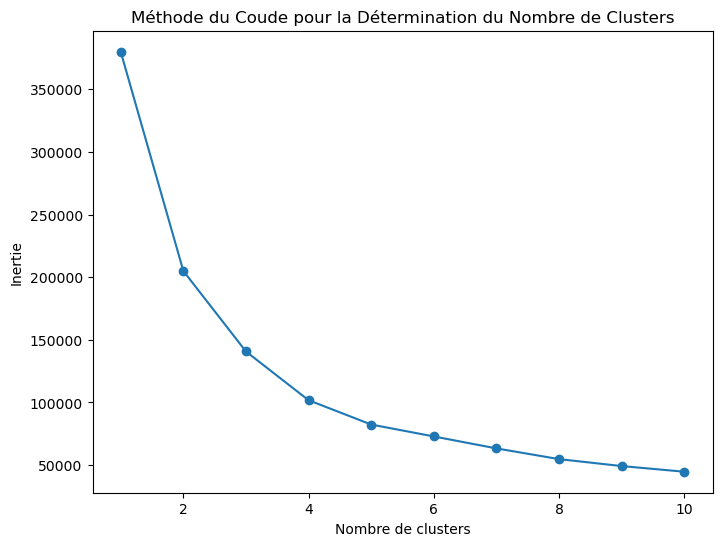

In [27]:
df_Y = df.drop('customer_id', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_Y)

inertis = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertis.append(kmeans.inertia_)

# Tracé de la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertis, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la Détermination du Nombre de Clusters')
plt.show()




In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_X = df.drop('customer_id', axis=1)
scaled_features = scaler.fit_transform(df_X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

df

,customer_id,Recency,Frequency,Monetary,Cluster
0,9ef432eb6251297304e76186b10a928d,26.906558,2,1.488100,1
1,b0830fb4747a6c6d20dea0b8c802d7ef,14.017321,1,1.601216,2
2,41ce2a54c0b03bf3443c3d931a367089,12.924112,1,1.647432,2
3,f88197465ea7920adcdbec7375364d82,25.385337,1,1.457031,0
4,8ab97904e6daea8866dbdbc4fb7aad2c,22.215955,1,1.220373,2
...,...,...,...,...,...
94978,39bd1228ee8140590ac3aca26f2dfe00,32.588038,1,1.494089,0
94979,1fca14ff2861355f6e5f14306ff977a7,22.491884,1,1.663569,2
94980,1aa71eb042121263aafbe80c1b562c9c,28.001795,1,1.723809,0
94981,b331b74b18dc79bcdf6532d51e1637c1,23.592444,1,1.686544,0


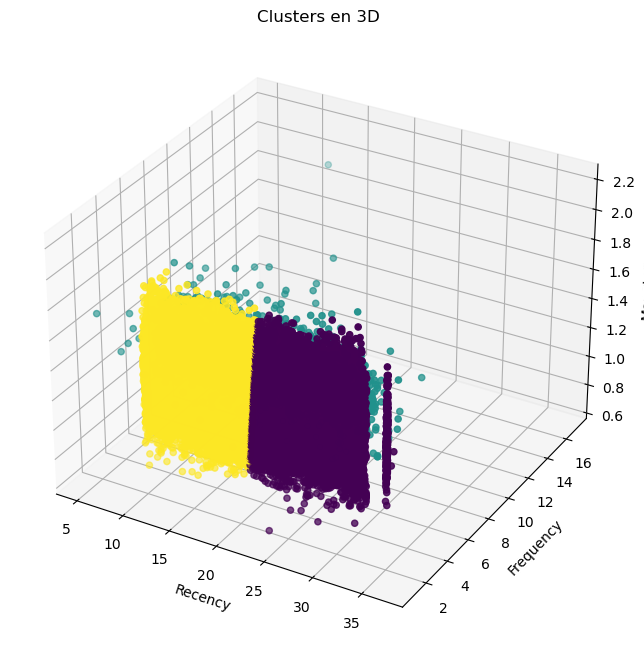

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('Clusters en 3D')
plt.show()